<a href="https://colab.research.google.com/github/mmwuu/sklearn-spotify-dataset/blob/main/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 1: Programming Assignment (20 marks)

Student Name: `Michael Wu`

Student ID: `1388097`

## General info

<b>Due date</b>: Friday, 12 April 2024 5pm

<b>Submission method</b>: Canvas submission

<b>Submission materials</b>: completed copy of this iPython notebook

<b>Late submissions</b>: -10% per day up to 5 days (both weekdays and weekends count)
<ul>
    <li>one day late, -2.0;</li>
    <li>two days late, -4.0;</li>
    <li>three days late, -6.0;</li>
    <li>four days late, -8.0;</li>
    <li>five days late, -10.0;</li>
</ul>

<b>Marks</b>:  This assignment will be marked out of 20, and make up 20% of your overall mark for this subject.

<b>Materials</b>: See [Using Jupyter Notebook and Python page] on Canvas (under Modules> Coding Resources) for information on the basic setup required for this class, including an iPython notebook viewer and the python packages `numpy`, `pandas`, `matplotlib` and `sklearn`. You can use any Python built-in packages, but do not use any other 3rd party packages; if your iPython notebook doesn't run on the marker's machine, you will lose marks. <b> You should use Python 3</b>.  

<b>Evaluation</b>: Your iPython notebook should run end-to-end without any errors in a reasonable amount of time, and you must follow all instructions provided below, including specific implementation requirements and instructions for what needs to be printed (please avoid printing output we don't ask for). You should edit the sections below where requested, but leave the rest of the code as is. You should leave the output from running your code in the iPython notebook you submit, to assist with marking. The amount each section is worth is given in parenthesis after the instructions.


<b>Updates</b>: Any major changes to the assignment will be announced via Canvas. Minor changes and clarifications will be announced on Canvas>Assignments>Assignmnet1; we recommend you check it regularly.

<b>Academic misconduct</b>: This assignment is an individual task, and so reuse of code or other instances of clear influence will be considered cheating. Please check the <a href="https://canvas.lms.unimelb.edu.au/courses/124196/modules#module_662096">CIS Academic Honesty training</a> for more information. We will be checking submissions for originality and will invoke the University’s <a href="http://academichonesty.unimelb.edu.au/policy.html">Academic Misconduct policy</a> where inappropriate levels of collusion or plagiarism are deemed to have taken place. Content produced by an AI (including, but not limited to ChatGPT) is not your own work, and submitting such content will be treated as a case of academic misconduct, in line with the <a href="https://academicintegrity.unimelb.edu.au/plagiarism-and-collusion/artificial-intelligence-tools-and-technologies"> University's policy</a>.

**IMPORTANT**

Please carefully read and fill out the <b>Authorship Declaration</b> form at the bottom of the page. Failure to fill out this form results in the following deductions:
<UL TYPE=”square”>
<LI>Missing Authorship Declaration at the bottom of the page, **-1.0**
<LI>Incomplete or unsigned Authorship Declaration at the bottom of the page, **-0.5**
</UL>


## Overview:
For this assignment, you will apply a number of classifiers on a given dataset, and
explore various evaluation paradigms and analyze the impact of multiple parameters on the performance of the classifiers. You will then answer a number of conceptual questions about the Naive Bayes classifier, K-nearest neighbors, and Decision Tree and a number of baselines based on your observations.

## Data Sets:
In this assignment, you will work with the following dataset., which is adapted from Spotify website:

 - **Spotify**: You predict the genre of a Spotify track, based on various audio features and meta data information such as Artists and Album Name. More information can be found on the given README file.



Here we have imported some of the modules and libraries that you might need to use.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
from collections import defaultdict, Counter

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score,f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [ ]:
# ignore warnings
pd.options.mode.chained_assignment = None # default='warn'

## Question 1. Reading and Pre-processing [2.5 marks]

First, we read in the data into a pandas DataFrame.

**A)** Print the first 3 rows of the DataFrame.

**B)** Replace missing values denoted by `?` with a value using the **most suitable** data imputation methodology given the nature of given data. **[1.25 marks]** Please provide justification for your chosen methodology. **[0.75 marks]**

**NOTE:** *There are multiple methods for performing data imputation. It is crucial to select the most appropriate method for each feature in this dataset and justify the selection. Different methods may be used for different features.*  


Answer: Given the numeric nature of the popularity feature, and given that it is a score from 0 to 100, the data imputation methodology chosen is the median value. Furthermore, the data has a large number of zeros, so the median was chosen instead of the mean. The mean here is 28.

For other numeric features, the number of missing values is very small compared to the size dataset. So, they will be dropped.

For the artists name, I will use a fixed value methodology and replace the missing data with 'Not Available' for all cases.

For the track_name, there are cases of #NAME?. For these values, I will also use the fixed value methodology and replace them with album_name.

In [ ]:
df = pd.read_csv('Spotify.csv')

## your code here
# A) Print first 3 rows of DataFrame
df.iloc[0:3]


,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Limoblaze;Lecrae;Happi,Jireh (My Provider),Jireh (My Provider),64,168000,0,0.443,0.778,0,-7.564,0,0.266,0.241,0.0,0.2150,0.628,128.250,5,afrobeat
1,Criolo,Ainda Há Tempo,Ainda Há Tempo,44,318360,0,0.580,0.800,6,-7.528,1,0.345,0.281,0.0,0.0708,0.483,81.303,4,afrobeat
2,Criolo,Fellini,Fellini,?,171989,0,0.805,0.746,1,-5.211,0,0.185,0.238,0.0,0.2150,0.717,127.922,4,afrobeat


In [ ]:
# B) Replace missing values
# for popularity
df['popularity'] = df['popularity'].replace('?', pd.NA)
median_popularity = df['popularity'].median()
df['popularity'] = df['popularity'].fillna(median_popularity)
df['popularity'] = df['popularity'].astype(int)

# drop remaining rows with missing data
df = df.replace('?', pd.NA)
df.dropna(inplace=True)


# For artists
df['artists'] = df['artists'].replace('?', 'Not Available')

# For track_name
df.loc[df['track_name'] == '#NAME?', 'track_name'] = df['album_name']

# Demonstration of filled in datagram
df.iloc[0:3]

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Limoblaze;Lecrae;Happi,Jireh (My Provider),Jireh (My Provider),64,168000,0,0.443,0.778,0,-7.564,0,0.266,0.241,0.0,0.2150,0.628,128.250,5,afrobeat
1,Criolo,Ainda Há Tempo,Ainda Há Tempo,44,318360,0,0.580,0.800,6,-7.528,1,0.345,0.281,0.0,0.0708,0.483,81.303,4,afrobeat
2,Criolo,Fellini,Fellini,28,171989,0,0.805,0.746,1,-5.211,0,0.185,0.238,0.0,0.2150,0.717,127.922,4,afrobeat


**C)** We used `train_test_split` to divide the processed `df` into 80% train, 20% test. Use the splitted datasets to train and test the Zero-R baseline model and report the accuracy. **[0.25 marks]** Provide an explanation for your results. **[0.25 marks]**

Answer: Zero-R predicts the most frequent class in the training data, thus it will apply the most common track_genre to the test data. The accuracy of 0.071 means
that the most common track genre only accounts for about 7.1% of the data. For a varied dataset like Spotify.csv, the Zero-R classifier is not very good.

In [ ]:
X = df[df.columns.difference(['track_genre'])]
y = df['track_genre']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)

## your code here

# C) Train and test zero-r baseline model
# Train a Zero-R model.
clf = DummyClassifier(strategy = "most_frequent")
clf.fit(X_train, y_train)

# Predict labels for the instances in the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy of the model
ZeroR_Acc = accuracy_score(y_test, y_pred)



##########

print("Accuracy of the basement", ZeroR_Acc.round(3))

Accuracy of the basement 0.072


## Question 2. Naive Bayes models [6.5 marks]

In this part you need to use two Naive Bayes models "Gaussian Naive Bayes" and "Multinominal Naive Bayes". For both these models you need to deal with the three features that are not numeric (`artists`, `album_name` and `track_name`). We are going to run TWO experiments. For each experiment you need to Divide the `df` into 80% train and 20% test splits, using the stratification strategy. Set the `random_state` equal to `90049` and shuffle argumnet equal to `True`. Then, train and test for both models. Report the accuracy of your models.

### Experiment 1.

**A)** Remove the the features `artists`, `album_name` and `track_name` and use the other features to train and test the two Naive Bayes Model. Report the performance of the two models. **[1.5 marks]**

**NOTE:** *You will need to find a solution to appropriately fix the issue of negative values for the "Multinominal Naive Bayes" model. Explain and justify the method you have used.*



Report on the perfomance of the two models:

Accuracy of GNB using only numeric features: 0.38

Accuracy of MNB using only numeric features: 0.386



Answer:

To fix the issue of negative values for the "Multinomial Naive Bayes" model, I used the MinMaxScaler to translate each feature individually such that it is in the given range on the training dataset - between zero and one. this was chosen as it is part of the sklearn package and simple to implement. Using np.abs() on X_train was considered, however the dataset is not in the correct data type for it.

In [ ]:

## your code here

from sklearn.preprocessing import MinMaxScaler

# remove the features artists, album_name and track_name
X_new = X.drop(['artists', 'album_name', 'track_name'], axis=1)

# use MinMaxScaler to fix th eissue of negative values for the MultinominalNB
scaler = MinMaxScaler()
X_new_positive = scaler.fit_transform(X_new)

# train_test_split
X_train_GNB, X_test_GNB, y_train, y_test = train_test_split(X_new, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)
X_train_MNB, X_test_MNB, y_train, y_test = train_test_split(X_new_positive, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)

# initialise
gnb = GaussianNB()
mnb = MultinomialNB()

# train the model
gnb.fit(X_train_GNB, y_train)
mnb.fit(X_train_MNB, y_train)

# Predict labels for the instances in the test set
y_pred_GNB = gnb.predict(X_test_GNB)
y_pred_MNB = mnb.predict(X_test_MNB)

# Calculate the accuracy of the model
GNB_Acc_1 = accuracy_score(y_test, y_pred_GNB)
MNB_Acc_1 = accuracy_score(y_test, y_pred_MNB)


#################

print("Accuracy of GNB using only numeric features:", GNB_Acc_1.round(3))
print("Accuracy of MNB using only numeric features:", MNB_Acc_1.round(3))


Accuracy of GNB using only numeric features: 0.38
Accuracy of MNB using only numeric features: 0.386


### Experiment 2

**B)** Transform features `artists`, `album_name` and `track_name` to numeric values using the `CountVectorizer` function. Use all the features (including the transformed ones) to train and test the two Naive Bayes Model. Report the performance of the two models. **[2 marks]**

*NOTE: Running this code can be time consuming depending on your processing power.*


Report on the perfomance of the two models:

Accuracy of GNB: 0.383

Accuracy of MNB: 0.854

In [ ]:
## your code here

# Use vectorizer to convert to numeric
vectorizer = CountVectorizer()
artists = vectorizer.fit_transform(df['artists'])
album_name = vectorizer.fit_transform(df['album_name'])
track_name = vectorizer.fit_transform(df['track_name'])

# store the arrays
artists = artists.toarray()
album_name = album_name.toarray()
track_name = track_name.toarray()

# combine with all numeric dataframe.
X_vectorized = np.concatenate((X_new, artists, album_name, track_name), axis=1)

# as with before:
# use MinMaxScaler to fix the issue of negative values for the MultinominalNB
scaler = MinMaxScaler()
X_vectorized_positive = scaler.fit_transform(X_vectorized)

# train_test_split
X_train_GNB, X_test_GNB, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)
X_train_MNB, X_test_MNB, y_train, y_test = train_test_split(X_vectorized_positive, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)

# initialise
gnb = GaussianNB()
mnb = MultinomialNB()

# train the model
gnb.fit(X_train_GNB, y_train)
mnb.fit(X_train_MNB, y_train)

# Predict labels for the instances in the test set
y_pred_GNB = gnb.predict(X_test_GNB)
y_pred_MNB = mnb.predict(X_test_MNB)

# Calculate the accuracy of the model
GNB_Acc_2 = accuracy_score(y_test, y_pred_GNB)
MNB_Acc_2 = accuracy_score(y_test, y_pred_MNB)


###################

print("Accuracy of GNB:", GNB_Acc_2.round(3))
print("Accuracy of MNB:", MNB_Acc_2.round(3))



Accuracy of GNB: 0.383
Accuracy of MNB: 0.854


**C)** The two Naive Bayes (NB) classifiers in experiments 1 and 2 showed different performances. Explain in your words what is the reason for these differences in this dataset. Your answer should include the following parts (Limit your answer to maximum 200 words for each section):
- Compare the results of MNB and GNB in Experiment 1 and explain your observation. **[0.5 marks]**
- Compare the results of MNB and GNB in Experiment 2 and explain your observation.  **[0.5 marks]**
- Compare the results of MNB and GNB from Experiment 1 to Experiment 2 **[0.5 marks]**

1. Compare the results of MNB and GNB in Experiment 1 and explain your observation.

After testing in Experiment 1, the 2 models achieved a similar accuracy to each other. The Multinomial Naive Bayes (MNB) model produced the higher accuracy of 38.6% compared to 38.0% of the Gaussian Naive Bayes (GNB). This is expected due to the complex nature of the dataset. This could mean that the dataset is a marginally better fit for a multinomial distribution than a gaussian distribution. This makes sense as the data has features that may follow a normal distribution such as popularity, but also features that can be counted such as duration.
It should also be noted that it is a big improvement on the Zero-R model's accuracy.



2. Compare the results of MNB and GNB in Experiment 2 and explain your observation.

In Experiment 2, the Gaussian Naive Bayes model produced a lower accuracy than the Multinomial model. The gaussian accuracy was 38.3%, while the multinomial's accuracy was much higher at 85.4%, thus the latter is the better choice on this dataset.

This is also likely due to how the gaussian model is more suited for data that follows a normal distribution, while the multinomial model is better for  data that can be counted. Specifically introducing the discrete features of artist, album name, and track name made the multinomial model much more accurate.

3. Compare the results of MNB and GNB from Experiment 1 to Experiment 2.

For GNB, results were very similar between the two experiments. 38% compared to 38.3%. The increase could be due to the addition of 3 more features to work with, however the discrete nature of these features meant that they were of minimal help.

For MNB, the accuracy was significantly higher for experiment 2. The introduction of the numeric representation for artists, album and track name greatly benefited this model as it is more suited to this type of data and the accuracy rose from 38.6% to 85.4%.



**D)** Propose a method to enhance the performance of the "Multinomial Naive Bayes" model by adjusting its hyperparameters? **[0.5 marks]** Provide a rationale for your proposed solution and present two supporting reasons if applicable. **[1 mark]** (Limit your answer to maximum 200 words)

*NOTE: You may opt to design a test code to validate your hypothesis regarding the potential enhancement in model performance. However, this coding part is optional.*

Answer:

A method to enhance the performance of the "Multinomial Naive Bayes" model is by adjusting its smoothing hyperparameter. For MultinomialNB in sklearn, this is the alpha parameter. By default alpha = 1, meaning it is performing add 1 smoothing. This is good for avoiding the problem of zero probabilities in the data, however it may be possible to further enhance the model's performance by adjusting alpha. Alpha can be increased to an optimised value that will reduce variance and avoid overfitting, while not underfitting. Thus, adjusting the smoothing or 'alpha' parameter is a potential method.

## Question 3. Decision Tree [4 marks]
### Experiment 3
**A)** For the dataset utilized in Experiment 1, which includes all features except `artists`, `album_name`, and `track_name`, replicate the experiment with a Decision Tree classifier using a random state of `2024`. Employ the `Information Gain` as the criterion for splitting. **[0.5 Marks]**

Report:

Accuracy of DT: 0.595

In [ ]:
## your code here
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)

# Initialise
dt = DecisionTreeClassifier(criterion='entropy', random_state=2024)

# Train
dt.fit(X_train, y_train)

# Predict labels for the instances in the test set
y_pred_DT = dt.predict(X_test)

# Calculate the accuracy of the model
DT_Acc_1 = accuracy_score(y_test, y_pred_DT)


print("Accuracy of DT:", DT_Acc_1.round(3))

# Report the root and first two children
root = X.columns[dt.tree_.feature[0]]
left_node = X.columns[dt.tree_.feature[dt.tree_.children_left[0]]]
right_node = X.columns[dt.tree_.feature[dt.tree_.children_right[0]]]


print("Root:", root)
print("Left child:", left_node)
print("Right child:", right_node)

Accuracy of DT: 0.595
Root: acousticness
Left child: loudness
Right child: loudness


**B)** Report the root and first two children (root node's right and left nodes) for this Decision Tree. **[0.75 marks]** Explain your findings. **[0.75 marks]**

Report the root and first two children:

The root is 'acousticness'. The first two children are both 'loudness'.

Explain your findings:

This means that the acousticness feature had the highest information gain and was chosen as the splitting feature for the root node. Similarly, it mean that loudness was the most informative for the next split. So, loudness can be said to be the most predictive withing the subsets of the acoustiness split. For estimating track_genre, it suggets that the combination of acousticness and loudness is the most important determiner.

### Experiment 4

**C)** For the dataset utilized in Experiment 2, which includes all features, replicate the experiment with a Decision Tree classifier using a random state of `2024`. Employ the `Information Gain` as the criterion for splitting. **[0.5 Marks]**

Report:

Accuracy of DT: 0.63


In [ ]:

## your code here

# Use vectorizer to convert to numeric
vectorizer = CountVectorizer()
artists = vectorizer.fit_transform(df['artists'])
album_name = vectorizer.fit_transform(df['album_name'])
track_name = vectorizer.fit_transform(df['track_name'])

# store the arrays
artists = artists.toarray()
album_name = album_name.toarray()
track_name = track_name.toarray()

# combine with all numeric dataframe.
X_vectorized = np.concatenate((X_new, artists, album_name, track_name), axis=1)


# Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)

# Initialise
dt = DecisionTreeClassifier(criterion='entropy', random_state=2024)

# Train
dt.fit(X_train, y_train)

# Predict labels for the instances in the test set
y_pred_DT = dt.predict(X_test)

# Calculate the accuracy of the model
DT_Acc_2 = accuracy_score(y_test, y_pred_DT)


################

print("Accuracy of DT:", DT_Acc_2.round(3))


Accuracy of DT: 0.63


**D)** Perform Feature Selection strategically to maximize the accuracy of the Decision Tree classifier using a random state of `2024` and `Information Gain` as the splitting criterion. **[1 Marks]**

answer:

Accuracy of original DT: 0.63

Accuracy of artists and album_name: 0.775

Accuracy of only artists: 0.871

Accuracy of artists and acousticness 0.491

In [ ]:
## your code here

# vectorizer declaration repeated because I needed to run this code
# directly after running the code up to but not including Q2 Experiment 2 due
# to ram limits in Colaboratory.

# Use vectorizer to convert to numeric
vectorizer = CountVectorizer()
artists = vectorizer.fit_transform(df['artists'])
album_name = vectorizer.fit_transform(df['album_name'])
track_name = vectorizer.fit_transform(df['track_name'])

# Store the arrays
artists = artists.toarray()
album_name = album_name.toarray()
track_name = track_name.toarray()



##
## album_name and artists
##
# Combine
X_aa = np.concatenate((artists, album_name), axis=1)
# Train_test_split
X_train_aa, X_test_aa, y_train, y_test = train_test_split(X_aa, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)
# Initialise
dt = DecisionTreeClassifier(criterion='entropy', random_state=2024)
# Train
dt.fit(X_train_aa, y_train)
# Predict labels for the instances in the test set
y_pred_DT_aa = dt.predict(X_test_aa)
# Calculate the accuracy of the model
DT_Acc_aa = accuracy_score(y_test, y_pred_DT_aa)



##
# artists only
##
# Rest as before but modified for artists only:
X_train_artists, X_test_artists, y_train, y_test = train_test_split(artists, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)
dt.fit(X_train_artists, y_train)
y_pred_DT_artists = dt.predict(X_test_artists)
DT_Acc_artists = accuracy_score(y_test, y_pred_DT_artists)



##
# artists, acousticness, and loudness
##

# Select features
df_selected = df[['acousticness']]
# Combine selected features with numeric artists and album_name
X_selected = np.concatenate((df_selected, artists), axis=1)
# Rest as before but for x_selected:
X_train_select, X_test_select, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, train_size=0.8, random_state=90049, shuffle=True, stratify=y)
dt.fit(X_train_select, y_train)
y_pred_DT_select = dt.predict(X_test_select)
DT_Acc_select = accuracy_score(y_test, y_pred_DT_select)

###################

print("Accuracy of original DT: 0.63")

print("Accuracy of artists and album_name:", DT_Acc_aa.round(3))

print("Accuracy of only artists:", DT_Acc_artists.round(3))

print("Accuracy of artists and acousticness", DT_Acc_select.round(3))


Accuracy of original DT: 0.63
Accuracy of artists and album_name: 0.775
Accuracy of only artists: 0.871
Accuracy of artists and acousticness 0.491


**E)** In your own words, explain why you think the modification you proposed in part **D** has improved the accuracy of your Decision Tree classifier. Provide ONE possible reason. **[0.5 marks]** (Limit your answer to maximum 200 words)

My approach and hypothesis to this question is to think generally about the task at hand. Intuitively, an artist or album is directly associated with a genre. For example, people know that Justin Bieber is a pop artist, and AC/DC is a rock artist. Similarly, albums are associated with genres too, eg. 1989 is a pop album. After testing this hypothesis, it was found training the decision tree classifier on only the artists feature maximised it's accuracy.

Using the features with highest information gain from experiment 3 part A and combining it with artists was also considered, but artists and acousticness did not maximise the accuracy

As introduced earlier, one possible reason is because artists usually create all their songs within the same genre and rarely cross to other genres, thus being a better predictor of track_genre.

## Question 4. Evaluation [7 marks]

**A)** For Decision Tree in Experiment 4 part C, visualize the Confusion Matrix using the `ConfusionMatrixDisplay` method and identify the `track_genre` with the lowest and highest True Positive (TP) values. **[0.5 Marks]** Provide a discussion on intutive reasons of disparities in the outcomes associated with different genres. **[0.5 Marks]** (Limit your answer to maximum 200-300 words)

Answer:

The track genre with the lowest TP value is Blues and the track genre with the highest TP value is Tango.

Each genre of music is defined by a variety of factors such as tempo, instruments used, and geographical origin. Some of these factors are captured as features in the dataset, while others are missing. Intuitively, the model will perform better on genres that can be clearly defined by the features in the dataset, such as tempo, acousticness, and/or speechiness. For example, tango music is rythmic and features specific time signatures which are recognisable. This would be make it easier for the model to classify the genre. As a result, a higher TP is seen for Tango.

Some genres take inspiration from another genre and can have similar characteristics. With just the features in the dataset, it may be difficlt to categorise these songs. For example, blues has actually influenced many other genres in music and is the basis for jazz, rock and many pop songs. So, it may be more difficlt to recognise when a song is blues, rock or pop.

Another reason for the disparity in TP values could be that some genres have more representation in the data than others, so the model has more instances to learn from for that genre. This would negatively affect the genres that occur less frequently in the dataset.

Distinctive and highly represented genres have higher TP while genres with high cross-genre influence and less instances have lower TP. These are the intuitive reasons for disparities between the outcomes of different genres.

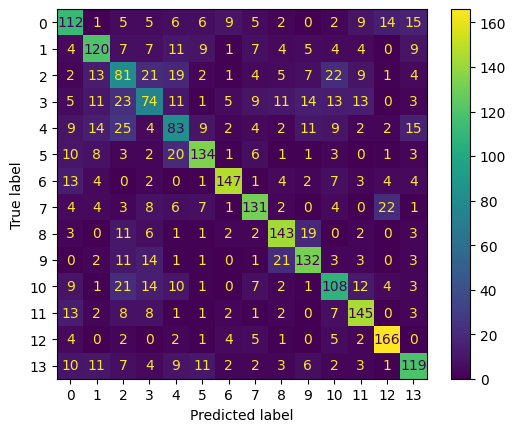

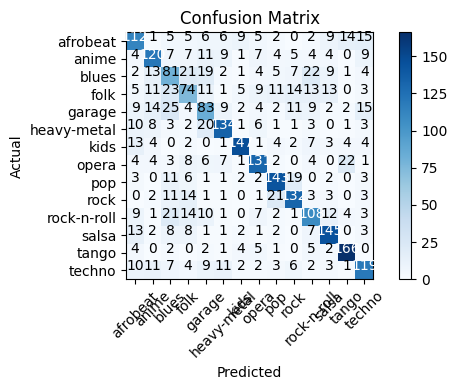

In [ ]:
## your code here

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_DT)

# Confusion Matrix Display
cm_display = ConfusionMatrixDisplay(cm).plot()

# Create a visualization of the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y_test)))
plt.xticks(tick_marks, np.unique(y_test), rotation=45)
plt.yticks(tick_marks, np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Adding annotations to the heatmap
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.show()



**B)** In Experiment 2, part C, for both the Multinomial Naive Bayes and Gaussian Naive Bayes models, provide the following values: **[2 marks]**
- **1.** What is the probability that a track that is an "techno" genre is identified by the model as an "techno" genre?
- **2.** What is the probability that if a track is identified by the model as "techno", it is in fact a "techno" genre track?

Report:

Part 1: What is the probability that a track that is an techno genre is identified by the model as an techno genre?

Probability value for GNB 0.307

Probability value for MNB 0.772



Part 2: What is the probability that if a track is identified by the model as techno, it is in fact a techno genre track?

Probability value for GNB 0.476

Probability value for MNB 0.874

In [ ]:
## your code here

########################
## Please run question 2 part B directly before running this.
########################


##
## Part 1: Among the actual techno tracks, how often are they correctly identified as techno?
##

# Get the predict_proba probability distribution for each song
gnb_proba = gnb.predict_proba(X_test_GNB)
mnb_proba = mnb.predict_proba(X_test_MNB)

# Get the locations of techno songs in the dataset by
# getting the locations of techno in the test set
locations_nb = np.where(y_test == 'techno')

# Take only the probability distributions of songs that are actually techno
techno_probabilities_gnb = gnb_proba[locations_nb]
techno_probabilities_mnb = mnb_proba[locations_nb]

# Within the probability distribution for a song, the track_genres are arranged in alphabetical order.
# Use classes_ to find the index of techno within the probability distributions.
index = list(gnb.classes_).index('techno')

# For actual the tracks that actually is techno, remove the probabilites of them being other genres,
# leaving only question 4B.1 - the probability that a track that is an "techno" genre is identified by the model as an "techno" genre.
# Get all rows in the 'index' column.
is_techno_as_techno_gnb = techno_probabilities_gnb[:, index]
is_techno_as_techno_mnb = techno_probabilities_mnb[:, index]

# Average the probabilites
print ("Part 1: What is the probability that a track that is an techno genre is identified by the model as an techno genre?")
print("Probability value for GNB", is_techno_as_techno_gnb.mean().round(3))
print("Probability value for MNB", is_techno_as_techno_mnb.mean().round(3))
print ("\n")

################

##
## Part 2: Among all the tracks that the model identifies to be techno, how many are actually techno?
##

# Needed to be converted to numpy array
y_test_array = y_test.values

# Get the locations where the model identifies songs as techno
locations_gnb = np.where(y_pred_GNB=='techno')
locations_mnb = np.where(y_pred_MNB=='techno')

# Get the actual genre for these locations where the model identifies songs as techno
actual_genre_gnb = y_test_array[locations_gnb]
actual_genre_mnb = y_test_array[locations_mnb]

# Store the which locations were correctly identified as techno in a boolean array.
is_techno_gnb = actual_genre_gnb == 'techno'
is_techno_mnb = actual_genre_mnb == 'techno'


# Count number of times where the model identifies the track to be techno and it was actually techno
correctly_identify_count_gnb = np.count_nonzero(is_techno_gnb)
correctly_identify_count_mnb = np.count_nonzero(is_techno_mnb)

# Calculate probabilities by dividing.
# Numerator: the number of times techno is correctly identified
# Denominator: the total number of times techno is indentified
as_techno_is_techno_gnb = correctly_identify_count_gnb / len(locations_gnb[0])
as_techno_is_techno_mnb = correctly_identify_count_mnb / len(locations_mnb[0])

# Print the probabilities

gnb_rounded = str(round(as_techno_is_techno_gnb, 3))
mnb_rounded = str(round(as_techno_is_techno_mnb, 3))

print ("Part 2: What is the probability that if a track is identified by the model as techno, it is in fact a techno genre track?")
print("Probability value for GNB", gnb_rounded)
print("Probability value for MNB", mnb_rounded)


################

Part 1: What is the probability that a track that is an techno genre is identified by the model as an techno genre?
Probability value for GNB 0.307
Probability value for MNB 0.772


Part 2: What is the probability that if a track is identified by the model as techno, it is in fact a techno genre track?
Probability value for GNB 0.476
Probability value for MNB 0.874


**C)** Comment on different behaviour of GNB and MNB for predicting 'techno' genre? **[1.5 marks]** Which model is performing better for this feature. Justify your answer.  **[1 mark]** (Limit your answer to maximum 200-300 words)

Answer:

In the above tests, it can be seen that MNB was more successful than GNB in finding the probability that a track that is a techno genre is identified by the model as a techno genre. MNB was also more successful at finding the probability that if a track is identified by the model as techno, it is in fact a techno genre track. Additionally, MNB was better at predicting the latter, at 0.874 compared to 0.772 for part 1.

In both these scenarios, the MNB model performed significantly better for the feature of techno. GNB makes an assumption that the features used to predict the techno genre is gaussian. This likely works against it as the features used more represent discrete values, thus favouring MNB.

**D)** For your Decision Tree in expeiment 4 part C, report the following values: **[0.5 marks]**
- What is the probability that a track that is an "techno" genre is identified by the model as an "techno" genre?
- What is the probability that if a track is identified by the model as "techno", it is in fact a "techno" genre track?

Answer:

Part 1: What is the probability that a track that is an techno genre is identified by the model as an techno genre?

Probability value for Decision Tree 0.626



Part 2: What is the probability that if a track is identified by the model as techno, it is in fact a techno genre track?

Probability value for Decision Tree 0.643

In [ ]:
# your code here

########################
## Please run question 4 part C directly before running this.
########################

# Predict labels for the instances in the test set
dt_proba = dt.predict_proba(X_test)

# Get the locations of techno songs in the dataset by
# getting the locations of techno in the test set
locations = np.where(y_test == 'techno')

# Take only the probability distributions of songs that are actually techno
techno_probabilities_dt = dt_proba[locations]

# Within the probability distribution for a song, the track_genres are arranged in alphabetical order.
# Use classes_ to find the index of techno within the probability distributions.
index = list(dt.classes_).index('techno')

# For actual the tracks that actually is techno, remove the probabilites of them being other genres,
# leaving only the probabilities that a track that is an "techno" genre is identified by the model as an "techno" genre.
# Get all rows in the 'index' column.
is_techno_as_techno_dt = techno_probabilities_dt[:, index]

# Average the probabilites
print ("Part 1: What is the probability that a track that is an techno genre is identified by the model as an techno genre?")
print("Probability value for Decision Tree", is_techno_as_techno_dt.mean().round(3))
print ("\n")

################

##
## Part 2: Among all the tracks that the model identifies to be techno, how many are actually techno?
##

# Needed to be converted to numpy array
y_test_array = y_test.values

# Get the locations where the model identifies songs as techno
locations_dt = np.where(y_pred_DT=='techno')

# Get the actual genre for these locations where the model identifies songs as techno
actual_genre_dt = y_test_array[locations_dt]

# Store the which locations were correctly identified as techno in a boolean array.
is_techno_dt = actual_genre_dt == 'techno'

# Count number of times where the model identifies the track to be techno and it was actually techno
correctly_identify_count_dt = np.count_nonzero(is_techno_dt)

# Calculate probabilities by dividing.
# Numerator: the number of times techno is correctly identified
# Denominator: the total number of times techno is indentified
as_techno_is_techno_dt = correctly_identify_count_dt / len(locations_dt[0])

# Print the probabilities

dt_rounded = str(round(as_techno_is_techno_dt, 3))

print ("Part 2: What is the probability that if a track is identified by the model as techno, it is in fact a techno genre track?")
print("Probability value for Decision Tree", dt_rounded)


Part 1: What is the probability that a track that is an techno genre is identified by the model as an techno genre?
Probability value for Decision Tree 0.626


Part 2: What is the probability that if a track is identified by the model as techno, it is in fact a techno genre track?
Probability value for Decision Tree 0.643


**E)** Name one of the benefit of using your Decision Tree in compare with the two Naive Bayes models you have implemented for this dataset? Connect this benefit to your obseravtions in this dataset.  **[1 mark]** (Limit your answer to maximum 200-300 words)

Answer:

One benefit of using Decision Tree compared to the to Naive Bayes models for this dataset is that the decision tree can better deal with both numerical and categorical features in the dataset. As seen in the spotify.csv dataset, there are a combination of categorical, numerical and missing data. With less data imputation, the Decision Tree may perform better than the Naive Bayes due to it's more versatile nature.

# Authorship Declaration:

   (1) I certify that the program contained in this submission is completely
   my own individual work, except where explicitly noted by comments that
   provide details otherwise.  I understand that work that has been developed
   by another student, or by me in collaboration with other students,
   or by non-students as a result of request, solicitation, or payment,
   may not be submitted for assessment in this subject.  I understand that
   submitting for assessment work developed by or in collaboration with
   other students or non-students constitutes Academic Misconduct, and
   may be penalized by mark deductions, or by other penalties determined
   via the University of Melbourne Academic Honesty Policy, as described
   at https://academicintegrity.unimelb.edu.au.

   (2) I also certify that I have not provided a copy of this work in either
   softcopy or hardcopy or any other form to any other student, and nor will
   I do so until after the marks are released. I understand that providing
   my work to other students, regardless of my intention or any undertakings
   made to me by that other student, is also Academic Misconduct.

   (3) I further understand that providing a copy of the assignment
   specification to any form of code authoring or assignment tutoring
   service, or drawing the attention of others to such services and code
   that may have been made available via such a service, may be regarded
   as Student General Misconduct (interfering with the teaching activities
   of the University and/or inciting others to commit Academic Misconduct).
   I understand that an allegation of Student General Misconduct may arise
   regardless of whether or not I personally make use of such solutions
   or sought benefit from such actions.

   <b>Signed by</b>: `Michael Yixiao Wu | 1388097`
   
   <b>Dated</b>: `09/04/2024`